# Chapter py_09 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [2]:
x = [1, 2, 3]
y = [2, 3, 4]
z = [2 * xi for xi in x]  # [2, 4, 6]
z = [xi + yi for xi, yi in zip(x, y)]  # [3, 5, 7]
z = [xi * yi for xi, yi in zip(x, y)]  # [2, 6, 12]

In [3]:
x = [1, 2, 3]
y = [2, 3, 4]
z = sum(xi * yi for xi, yi in zip(x, y))
print(z)  # Output: 20

20


In [4]:
import numpy as np

x = np.array([1, 2, 3])
y = np.array([2, 3, 4])
x = 2 * x # array([2, 4, 6])
z = x + y  # array([3, 5, 7])
z = x * y  # array([2, 6, 12])

In [5]:
z = np.sum(x * y)  # 20
z = np.dot(x, y)  # 20

In [6]:
import pandas as pd
baseball = pd.read_csv("baseball_payroll.csv")

rng = np.random.default_rng(seed=321)

x = baseball["Average Payroll (Million)"]
y = baseball["Total Wins"]

resamples = np.array([np.dot(x, rng.permutation(y))
                      for _ in range(100_000)])
observed = np.dot(x, y)

p_value = np.mean(resamples >= observed)
print(f"observed: {observed:.0f}")
print(f"resamples above observed: {np.sum(resamples >= observed)}")
print(f"p-value: {p_value}")

observed: 668620
resamples above observed: 6
p-value: 6e-05


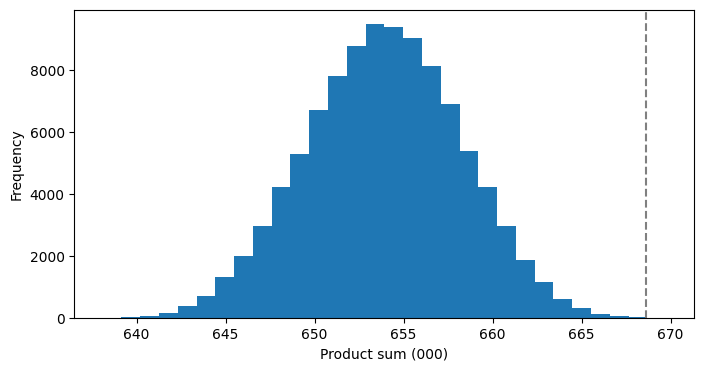

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(resamples / 1000, bins=30)
ax.axvline(observed / 1000, color="grey", linestyle="--")
ax.set_xlabel("Product sum (000)")
ax.set_ylabel("Frequency")
plt.show()

In [8]:
def correlation_coefficient(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    numerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    denomintor = (n - 1) * np.std(x, ddof=1) * np.std(y, ddof=1)
    return numerator / denomintor

x = baseball["Average Payroll (Million)"]
y = baseball["Total Wins"]
r = correlation_coefficient(x, y)
print(f"correlation coefficient: {r:.3f}")

correlation coefficient: 0.633


In [9]:
corrcoef_matrix = np.corrcoef(x, y)
print(corrcoef_matrix)
r = corrcoef_matrix[0, 1]
print(f"correlation coefficient: {r:.3f}")

[[1.         0.63345733]
 [0.63345733 1.        ]]
correlation coefficient: 0.633


In [10]:
corr_matrix = baseball[["Average Payroll (Million)", "Total Wins"]].corr()
print(corr_matrix)
r = corr_matrix.iloc[0, 1]
print(f"correlation coefficient: {r:.3f}")

                           Average Payroll (Million)  Total Wins
Average Payroll (Million)                   1.000000    0.633457
Total Wins                                  0.633457    1.000000
correlation coefficient: 0.633


In [11]:
rng = np.random.default_rng(seed=321)
resamples = np.array([np.corrcoef(x, rng.permutation(y))[0,1]
                      for _ in range(100_000)])
observed = np.corrcoef(x, y)[0,1]

p_value = np.mean(resamples >= observed)
print(f"observed: {observed:.3f}")
print(f"resamples above observed: {np.sum(resamples >= observed)}")
print(f"p-value: {p_value}")

observed: 0.633
resamples above observed: 6
p-value: 6e-05


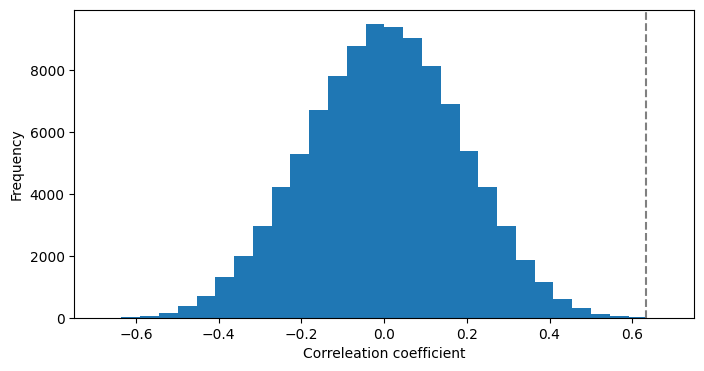

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(resamples, bins=30)
ax.axvline(observed, color="grey", linestyle="--")
ax.set_xlabel("Correleation coefficient")
ax.set_ylabel("Frequency")
plt.show()

In [13]:
from scipy import stats
r = observed
n = len(x)
t_value = r * np.sqrt(n - 2) / np.sqrt(1-r**2)
print(f"p-value {stats.t.sf(t_value, n-2):.2g}")
print(f"p-value {1 - stats.t.cdf(t_value, n-2):.2g}")

p-value 8.6e-05
p-value 8.6e-05


In [14]:
stats.pearsonr(x, y, alternative='greater')

PearsonRResult(statistic=0.6334573297712216, pvalue=8.57943607982072e-05)

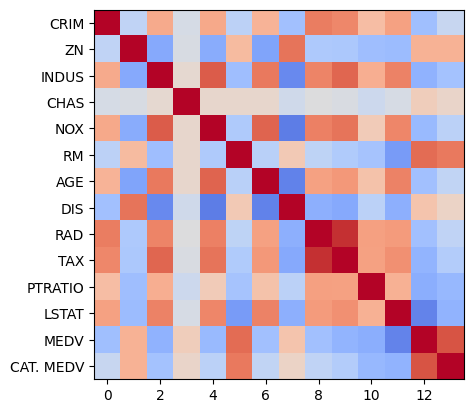

In [15]:
import matplotlib.pyplot as plt

housing = pd.read_csv("boston-housing-large.csv")
fig, ax = plt.subplots()
ax.imshow(housing.corr(), cmap='coolwarm', vmin=-1, vmax=1)
ax.set_yticks(range(housing.shape[1]))
ax.set_yticklabels(housing.columns)
plt.show()

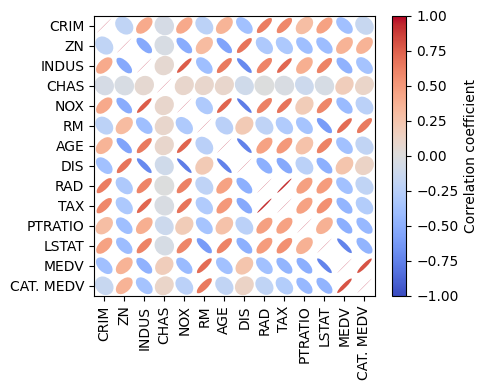

In [16]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                        norm=Normalize(vmin=-1, vmax=1),
                        transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(housing.corr(), figsize=(5, 4), cmap='coolwarm')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()